In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
amazon_df = pd.read_csv('amazon_cells_labelled.txt', delimiter= '\t', header=None)
amazon_df.to_csv('amazon.csv')


In [3]:
amazon_df.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [4]:
amazon_df.columns = ['comment', 'type']

In [5]:
keywords = ['love', 'excellent', 'good', 'best', 'satisfied', 'great', 'amazing']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon_df[str(key)] = amazon_df.comment.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

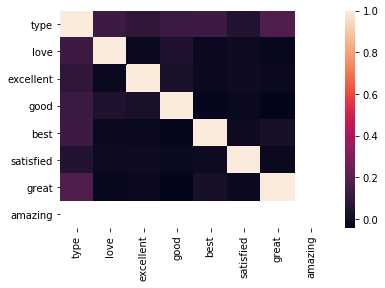

In [6]:
sns.heatmap(amazon_df.corr())

In [7]:
data = amazon_df[keywords]
target = amazon_df['type']

In [8]:
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 405


In [9]:
amazon_df.head()

,comment,type,love,excellent,good,best,satisfied,great,amazing
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,True,False,False,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False,False


In [ ]:
#Confusion Matrix 

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[487,  13],
       [392, 108]])

In [ ]:
#reading array: 
#487 (TP): Predicted postive and it's true
#108 (TN): Predicted negative and it's true
#13 (FP) TYPE I error: Predicted positive and it's false 
#392 (FN) TYPE II error: Predicted negative and it's false

In [ ]:
##Actual values: TRUE or FALSE 
##Predicted Values: POSTIVE or NEGATIVE 

In [12]:
#majority of the error is in False Negative (TYPE II Error), which is
#predicting it to be postive comments but it's actually negative comments

In [25]:
#Sensitivity: 
#Specificity: 

#sensitivity1 = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])
#print('Sensitivity : ', sensitivity1 )
#shows how good we are at identifying positives 

sensitivity = (108/(108+392))
print('Sensitivity: ', sensitivity)

specificity = (487/(487+13))
print('Specificity: ', specificity)

#specificity1 = confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])
#print('Specificity : ', specificity1)
#shows how good we are at identifying negatives

accuracy = (487/(487+392))
print('Accuracy: ', accuracy)



Sensitivity:  0.216
Specificity:  0.974
Accuracy:  0.5540386803185438


In [ ]:
#class imbalance: 
#accuracy1=(cm1[0,0]+cm1[1,1])/sum[(0,0):(0:1)]
#print ('Accuracy : ', accuracy1)

#55% off of 879 correctly classified messages and 405 incorrectly classified 
#45% were able to predict false postive comments 

In [ ]:
#Do any of your classifiers seem to overfit?
#Which seem to perform the best? Why?
#Which features seemed to be most impactful to performance?

In [26]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [27]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred = bnb.fit(data, target).predict(data)

In [28]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.595
Testing on Sample: 0.595


In [ ]:
#pretty consistent 

In [ ]:
#cross validation

In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.6 , 0.6 , 0.62, 0.58, 0.6 , 0.61, 0.59, 0.59, 0.62, 0.54])

In [ ]:
#What we want to see: consistency 
#That's exactly what we'd hope to see. The array that cross_val_score returns is a series 
#of accuracy scores with a different hold out group each time. If our model is overfitting 
#at a variable amount, those scores will fluctuate. Instead, ours are relatively consistent.

In [ ]:
#based on the evaluation techniques, it doesn't look like my classifers were overfitted, the results showed
#that they were relatively consistent with very little flucatuation 
#The best performance seemed to have come from...(ask Abdullah)
#The feature that seemed to be most impactful on performance was cross validation because it offered 
#good consistency among the values 
